In [2]:
import pandas as pd
import numpy as np 
import os

In [3]:
file_name = 'bank+marketing.zip'

if os.path.exists(file_name):
    pass
else:
    !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [4]:
data = pd.read_csv(r'C:\Users\hk3to\OneDrive\Documents\Data_Talks\Machine learning\work\Assignment\homework_3\bank+marketing\bank\bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
len(data)

45211

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df = data[['age', 'job', 'marital', 'education', 'balance', 'housing',
        'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [9]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [11]:
#Question 1

education_mode = df['education'].mode()[0]
education_mode

'secondary'

In [12]:
#Question 2
import seaborn as sns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [14]:
df['age'].dtype

dtype('int64')

In [15]:
numerical_columns = []
for col in df.columns:
    if df[col].dtype == 'int64':
        numerical_columns.append(col)

In [16]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [17]:
df_num = df[numerical_columns]
df_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


<Axes: >

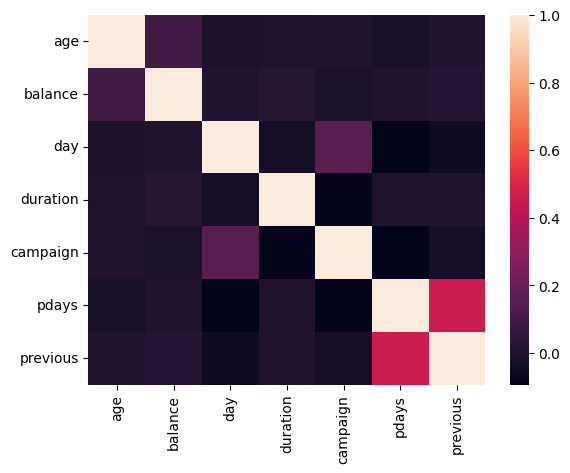

In [18]:
sns.heatmap(df_num.corr())

In [19]:
#dpay and previous day

In [20]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
df['y'] = df['y'].replace(['no','yes'],[0,1])
df['y']

C:\Users\hk3to\AppData\Local\Temp\ipykernel_12760\1798921742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].replace(['no','yes'],[0,1])


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [22]:
df['y'].unique()

array([0, 1], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train,df_test = train_test_split(df, test_size=.2, random_state=42)

In [25]:
df_train,df_val = train_test_split(df_full_train, test_size=.25001, random_state=42)

In [26]:
len(df_train),len(df_val),len(df_test)

(27125, 9043, 9043)

In [27]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24301,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
38618,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
18909,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
23081,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0
27395,32,services,single,secondary,11287,yes,cellular,21,nov,92,7,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13264,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown,0
28829,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown,0
3844,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown,0
15597,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown,1


In [28]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train  = df_train.y.values
y_test  = df_test.y.values
y_val  = df_val.y.values

del df_train['y']
del df_test['y']
del df_val['y']

In [29]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
1,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
2,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
3,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown
4,32,services,single,secondary,11287,yes,cellular,21,nov,92,7,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27120,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown
27121,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown
27122,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown
27123,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown


In [31]:
#Mutual information score

from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series,df_full_train.y)

In [32]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 3344 to 15795
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   balance    36168 non-null  int64 
 5   housing    36168 non-null  object
 6   contact    36168 non-null  object
 7   day        36168 non-null  int64 
 8   month      36168 non-null  object
 9   duration   36168 non-null  int64 
 10  campaign   36168 non-null  int64 
 11  pdays      36168 non-null  int64 
 12  previous   36168 non-null  int64 
 13  poutcome   36168 non-null  object
 14  y          36168 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.4+ MB


In [33]:
categorical = df_full_train.select_dtypes(include=['object']).columns

In [34]:
df_mi = df_full_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = True).apply(lambda x: round(x,2)).to_frame(name = 'MI')
df_mi

,MI
marital,0.00
education,0.00
job,0.01
housing,0.01
contact,0.01
month,0.02
poutcome,0.03


In [35]:
#Question 4 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [36]:
train_dict = df_train.to_dict(orient='records')
train_dict

[{'age': 38,
  'job': 'entrepreneur',
  'marital': 'married',
  'education': 'secondary',
  'balance': 0,
  'housing': 'yes',
  'contact': 'cellular',
  'day': 17,
  'month': 'nov',
  'duration': 258,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 49,
  'job': 'blue-collar',
  'marital': 'married',
  'education': 'secondary',
  'balance': 3309,
  'housing': 'yes',
  'contact': 'cellular',
  'day': 15,
  'month': 'may',
  'duration': 349,
  'campaign': 2,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 37,
  'job': 'housemaid',
  'marital': 'married',
  'education': 'primary',
  'balance': 2410,
  'housing': 'no',
  'contact': 'cellular',
  'day': 4,
  'month': 'aug',
  'duration': 315,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'poutcome': 'unknown'},
 {'age': 31,
  'job': 'self-employed',
  'marital': 'married',
  'education': 'tertiary',
  'balance': 3220,
  'housing': 'no',
  'contact': 'cellular',
  'day': 26,
  'month

In [37]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [38]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [39]:
X_train = dv.transform(train_dict)
X_train[0]

array([ 38.,   0.,   1.,   1.,   0.,   0.,  17., 258.,   0.,   1.,   0.,
         0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  -1.,   0.,   0.,
         0.,   1.,   0.])

In [40]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter = 1000,random_state=42)

In [42]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [54]:
from sklearn.metrics import accuracy_score

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [55]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [61]:
# y_pred = model.predict_proba(X_val)[:,1]
y_pred = model.predict(X_val)

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
original_accuracy = round(accuracy_score(y_val,y_pred),2)
original_accuracy

0.9

In [79]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
1,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
2,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
3,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown
4,32,services,single,secondary,11287,yes,cellular,21,nov,92,7,-1,0,unknown


In [82]:
from tqdm import tqdm

In [87]:
#Question 5
column = df_train.columns
feature_diff_dict = {}

for col in tqdm(column):

    new_df = df_train.drop(col,axis=1).copy()
    new_val = df_val.drop(col,axis=1).copy()

    
    
    new_train_dict = new_df.to_dict(orient='records')
    new_val_dict = df_val.to_dict(orient='records')

    dv_new = DictVectorizer(sparse=False)
    dv_new.fit(new_train_dict)

    model2 = LogisticRegression(solver='liblinear', C=1.0, max_iter = 1000,random_state=42)
    X_train_new = dv_new.transform(new_train_dict)
    model2.fit(X_train_new,y_train)

    X_val_new = dv_new.transform(new_val_dict)

    y_pred = model2.predict(X_val_new)
    ac_score = round(accuracy_score(y_val,y_pred),4)
    # ac_score = accuracy_score(y_val,y_pred)
    diff = original_accuracy - ac_score
    feature_diff_dict[col] = [ac_score,diff]

feature_diff_dict.values()

100%|██████████| 14/14 [00:15<00:00,  1.09s/it]


dict_values([[0.9007, -0.0006999999999999229], [0.901, -0.0010000000000000009], [0.9003, -0.00029999999999996696], [0.9001, -9.999999999998899e-05], [0.9007, -0.0006999999999999229], [0.9006, -0.0005999999999999339], [0.9006, -0.0005999999999999339], [0.9011, -0.0010999999999999899], [0.8997, 0.00029999999999996696], [0.8897, 0.010299999999999976], [0.9007, -0.0006999999999999229], [0.9007, -0.0006999999999999229], [0.9015, -0.0014999999999999458], [0.8931, 0.006900000000000017]])

In [88]:
feature_diff_dict

{'age': [0.9007, -0.0006999999999999229],
 'job': [0.901, -0.0010000000000000009],
 'marital': [0.9003, -0.00029999999999996696],
 'education': [0.9001, -9.999999999998899e-05],
 'balance': [0.9007, -0.0006999999999999229],
 'housing': [0.9006, -0.0005999999999999339],
 'contact': [0.9006, -0.0005999999999999339],
 'day': [0.9011, -0.0010999999999999899],
 'month': [0.8997, 0.00029999999999996696],
 'duration': [0.8897, 0.010299999999999976],
 'campaign': [0.9007, -0.0006999999999999229],
 'pdays': [0.9007, -0.0006999999999999229],
 'previous': [0.9015, -0.0014999999999999458],
 'poutcome': [0.8931, 0.006900000000000017]}

In [94]:
soretd_dict = sorted(feature_diff_dict.items(), key= lambda x: x[1][1] )
soretd_dict[0][0]

'previous'

In [98]:
#Question 6
c_val = [0.01, 0.1, 1, 10, 100]
best_score = {}

for val in tqdm(c_val):

    model3 = LogisticRegression(solver='liblinear', C=val, max_iter = 1000,random_state=42)
    model3.fit(X_train,y_train)
    y_pred = model3.predict(X_val)
    ac_score = accuracy_score(y_val,y_pred)
    best_score[val] = round(ac_score,3)

best_score

100%|██████████| 5/5 [00:00<00:00,  5.94it/s]


{0.01: 0.898, 0.1: 0.901, 1: 0.901, 10: 0.901, 100: 0.902}

In [99]:
best_score

{0.01: 0.898, 0.1: 0.901, 1: 0.901, 10: 0.901, 100: 0.902}